In [33]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.font_manager as fm

In [44]:
#csv 불러오기
filename = "melon_chart.csv"
df = pd.read_csv(filename)
df['singer'], df['album']  = df['album'], df['singer']

df

,rank,title,singer,album,date,like
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024.01.01 ~ 2024.01.07,114126
1,2,Drama,aespa,Drama - The 4th Mini Album,2024.01.01 ~ 2024.01.07,85715
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024.01.01 ~ 2024.01.07,143705
3,4,비의 랩소디,임재현,비의 랩소디,2024.01.01 ~ 2024.01.07,68730
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024.01.01 ~ 2024.01.07,287039
...,...,...,...,...,...,...
37849,96,그날 이후로,나윤권,김형석 With 나윤권,2010.12.26 ~ 2011.01.01,2378
37850,97,I'll Be Back,2PM,Still 2:00pm,2010.12.26 ~ 2011.01.01,9492
37851,98,널 지우는 일,김지수,널 지우는 일,2010.12.26 ~ 2011.01.01,1635
37852,99,Thanks To,"용준형, 양요섭",My Story,2010.12.26 ~ 2011.01.01,18396


In [30]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [49]:
df

,rank,title,singer,album,date,like
9399,100,가끔은,정효빈,가끔은,2020-01-06,15911
9371,72,영화 속에 나오는 주인공처럼,펀치 (Punch),동백꽃 필 무렵 (KBS2 수목드라마) OST - Part.6,2020-01-06,73454
9370,71,노을,다비치,사랑의 불시착 OST Part 3,2020-01-06,42408
9369,70,중2병,"염따, 딥플로우, 팔로알토 (Paloalto), The Quiett, 사이먼 도미닉",Dingo X DAMOIM (Part 3),2020-01-06,32258
9368,69,나의 어깨에 기대어요,10CM,호텔 델루나 OST Part.2,2020-01-06,121057
...,...,...,...,...,...,...
1428,29,Super Lady,(여자)아이들,2,2024-04-08,34920
1427,28,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',2024-04-08,287865
1425,26,너의 모든 순간,성시경,별에서 온 그대 OST Part.7,2024-04-08,295817
1436,37,Siren,RIIZE,Siren,2024-04-08,41339


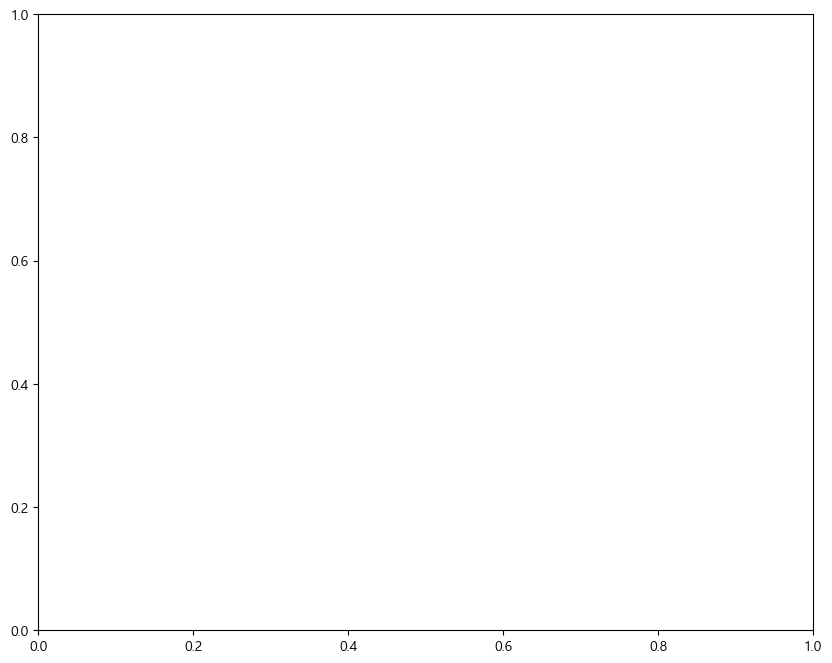

<Figure size 640x480 with 0 Axes>

In [50]:
filename = "melon_chart.csv"
df = pd.read_csv(filename)
df['singer'], df['album']  = df['album'], df['singer']

# 날짜 컬럼을 datetime으로 변환
df['date'] = pd.to_datetime(df['date'].str[:10])

# 2020년부터 2024년까지 데이터만 필터링
df = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2024)]

# 날짜로 정렬
df = df.sort_values(by='rank')

# 날짜별로 그룹화
grouped = df.groupby(df['date'].dt.to_period('D'))

# 그래프 초기화
fig, ax = plt.subplots(figsize=(10, 8))

def update(frame):
    ax.clear()
    current_date = frame.to_timestamp()
    current_df = grouped.get_group(frame).head(20)
    ax.barh(current_df['title'], current_df['like'], color='skyblue')
    ax.set_xlabel('Rank')
    ax.set_title(f'Date: {current_date.strftime("%Y-%m-%d")}')
    ax.invert_yaxis()
    plt.tight_layout()

# 애니메이션 실행
ani = FuncAnimation(fig, update, frames=grouped.groups.keys(), repeat=False, interval=2000)

# 애니메이션을 보여주기
plt.show()

ani.save('music_rankings.gif', writer='pillow', fps=2)

In [51]:
filename = "melon_chart.csv"
df = pd.read_csv(filename)
df['singer'], df['album']  = df['album'], df['singer']

def update(frame):
    ax.clear()
    current_date = frame.to_timestamp()
    current_df = grouped.get_group(frame).head(20)
    
    # 색상 지정
    colors = ['red' if i < 3 else 'orange' if i < 10 else 'yellow' for i in range(20)]

    bars = ax.barh(current_df['title'], current_df['like'], color=colors)
    ax.set_xlabel('Likes')
    ax.set_title(f'Date: {current_date.strftime("%Y-%m-%d")}')

    # 각 막대에 순위 표시
    for bar, rank in zip(bars, current_df['rank']):
        ax.text(
            bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'#{rank}', 
            va='center', ha='right', color='black', fontsize=8
        )
    
    ax.invert_yaxis()  # 상위 순위가 위로 오도록 y축을 뒤집습니다.
    plt.tight_layout()

# 애니메이션 실행
ani = FuncAnimation(fig, update, frames=grouped.groups.keys(), repeat=False, interval=500)

# 애니메이션을 보여주기
plt.show()

# 필요하다면 애니메이션을 저장할 수도 있습니다.
ani.save('music_rankings.gif', writer='pillow', fps=24)

<Figure size 640x480 with 0 Axes>